In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"/content/Concrete_Data.csv")

In [ ]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
# here we want to predict the strenght of the cement
# axis =1 means droping one coloumn
x= df.drop('strength',axis=1)
y=df['strength'] # the prediction value should be always be on y-axis

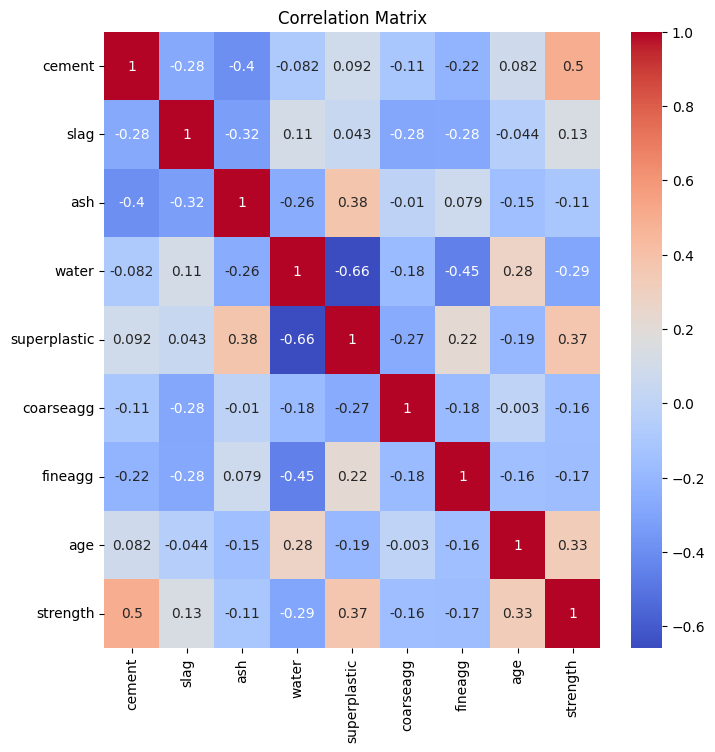

In [ ]:
# Plotting the correlation matrix "Heatmap"

# Setting the figure size for the plot
plt.figure(figsize=(8,8))

# Creating a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
# cmap='coolwarm' sets the color palette for the heatmap

# Adding a title to the heatmap
plt.title('Correlation Matrix')
# Displaying the heatmap
plt.show()

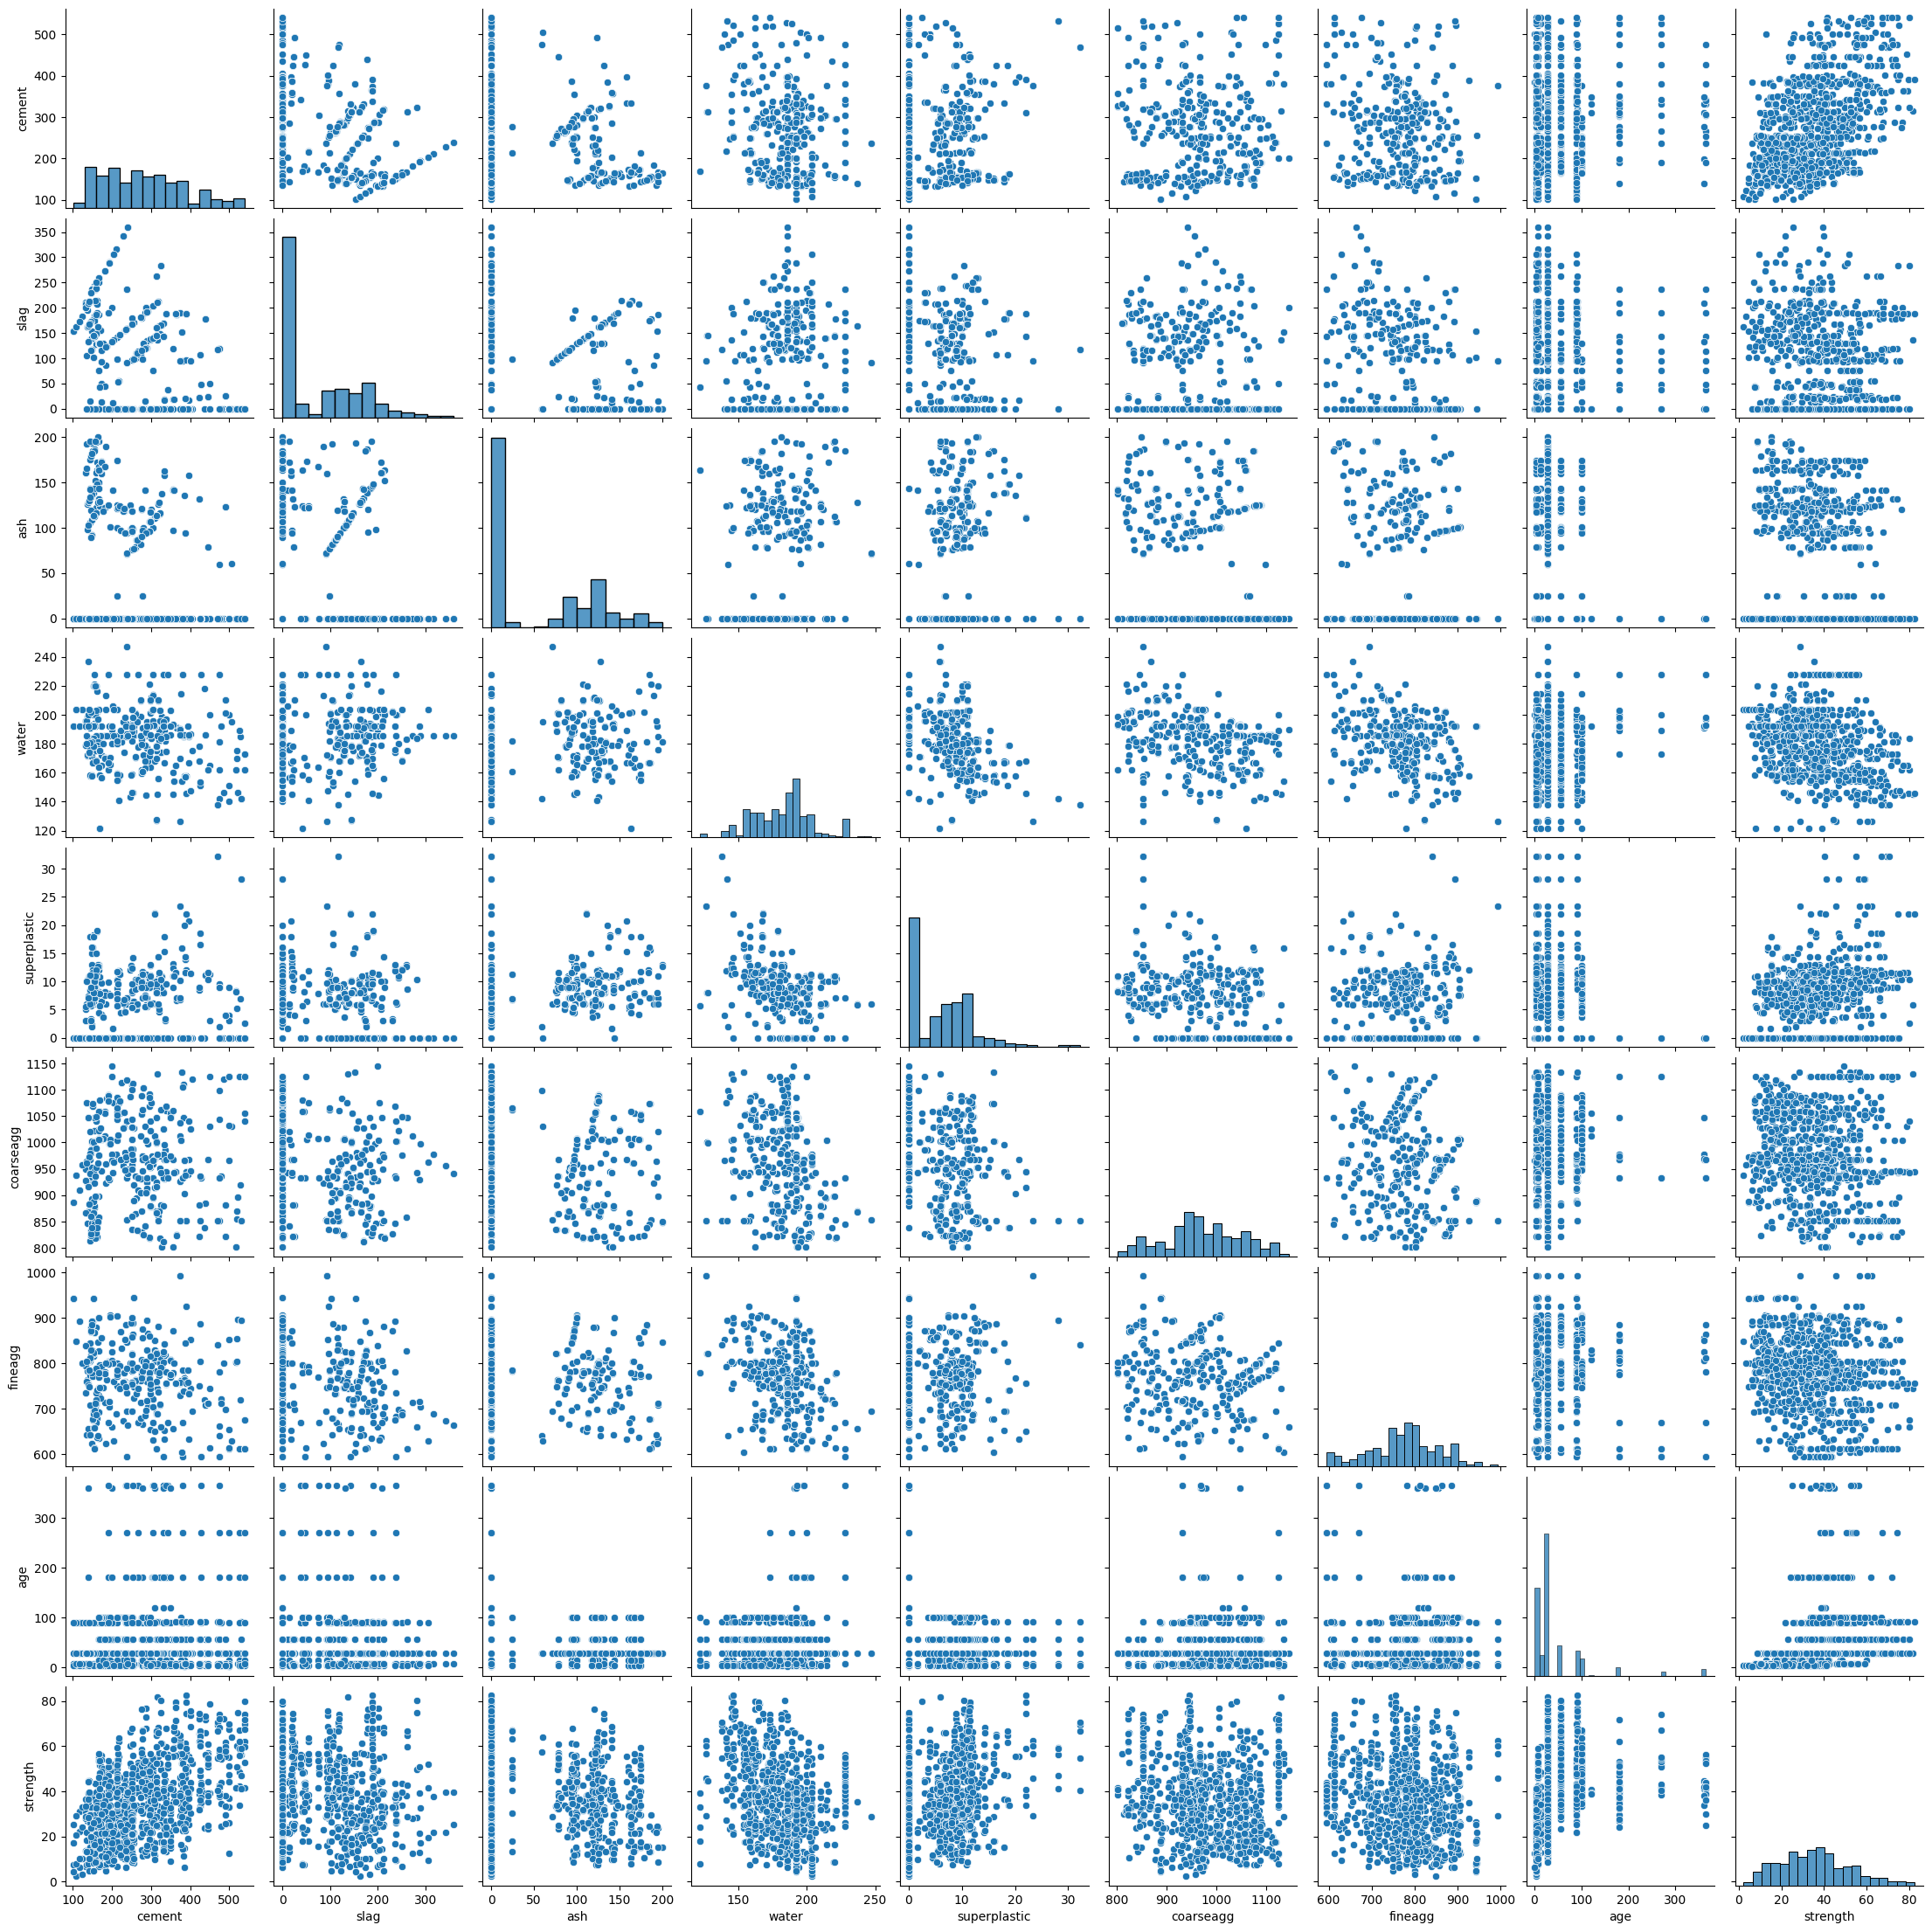

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

        feature        VIF
0        cement  15.456717
1          slag   3.329127
2           ash   4.147833
3         water  82.157569
4  superplastic   5.471094
5     coarseagg  84.955779
6       fineagg  72.790995
7           age   1.699459


In [ ]:
# dropping unnecessary Features
x = df.drop(['slag', 'ash', 'coarseagg','fineagg','strength'], axis=1)


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(len(x.columns))]

print(vif_data)

        feature       VIF
0        cement  7.916093
1         water  7.732993
2  superplastic  2.009949
3           age  1.633118


In [ ]:
x.columns

Index(['cement', 'water', 'superplastic', 'age'], dtype='object')

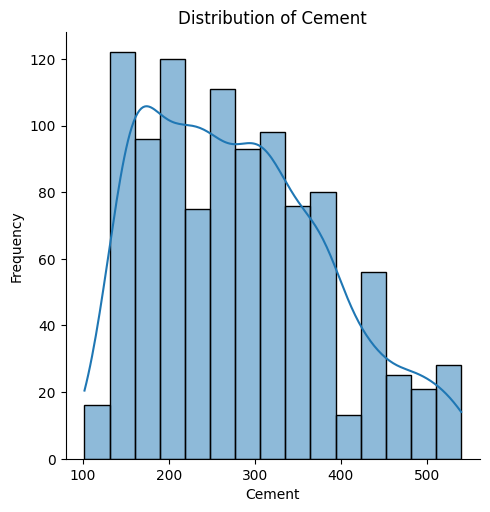

In [ ]:
sns.displot(df['cement'], kde=True)
plt.xlabel('Cement')
plt.ylabel('Frequency')
plt.title('Distribution of Cement')
plt.show()


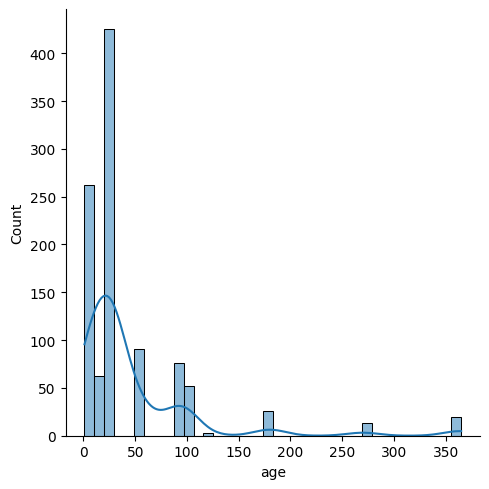

In [ ]:
sns.displot(df['age'], kde=True)


<Axes: xlabel='water', ylabel='Count'>

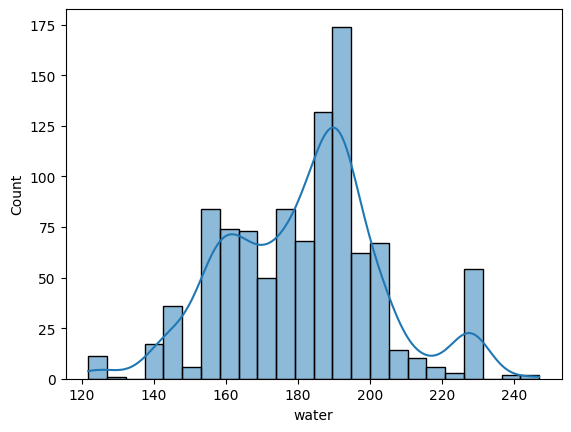

In [ ]:
sns.histplot(df['water'], kde=True)

<Axes: xlabel='superplastic', ylabel='Count'>

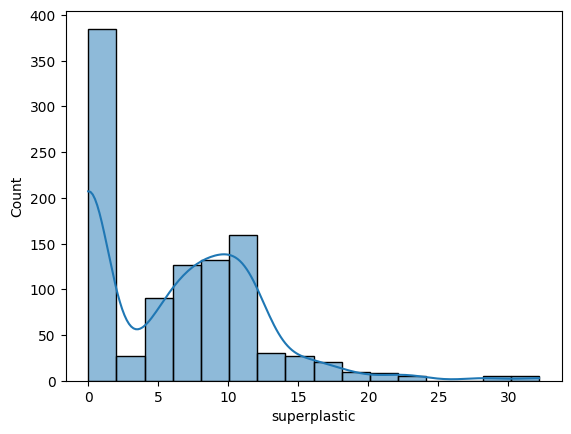

In [ ]:
sns.histplot(df['superplastic'], kde=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform on x_train
x_test_scaled = scaler.transform(x_test)       # Transform on x_test

# Creating and training the model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Making predictions on test data
y_pred_test = model.predict(x_test_scaled)

# Calculating R-squared
r2_test = r2_score(y_test, y_pred_test)

# Calculating MSE and RMSE
mse = mean_squared_error(y_test, y_pred_test)
rmse_test = mse ** 0.5

# Printing results
print("R-squared:", r2_test)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse_test)


R-squared: 0.5069175872236338
Mean Squared Error (MSE): 141.08984051524442
Root Mean Squared Error (RMSE): 11.878124452759552


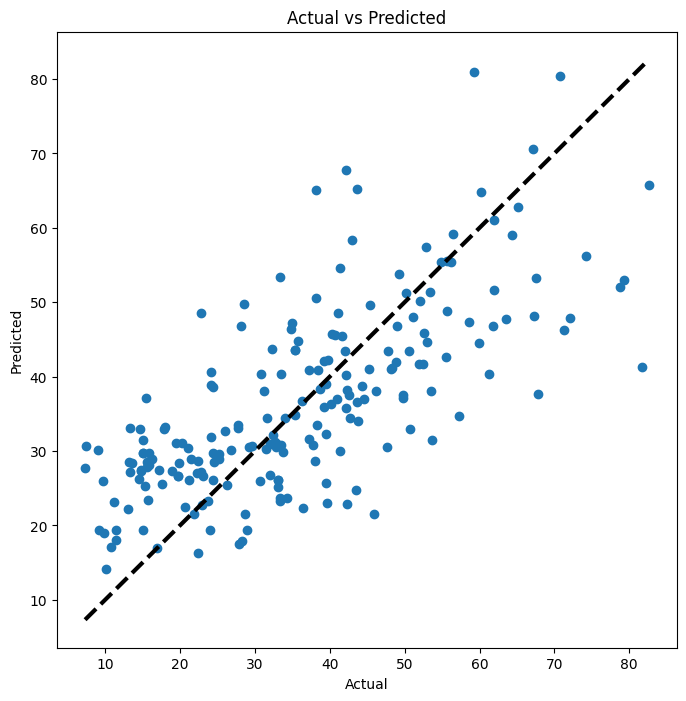

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
model.intercept_

np.float64(35.765570388349516)

In [ ]:
model.coef_

array([ 7.17998435, -3.03585424,  4.68882951,  6.7455122 ])

In [ ]:
model.score(x_train_scaled, y_train)

0.49635866693719144

In [ ]:
# Assuming x_train is a DataFrame, create a DataFrame for new_data with matching column names
new_data = [[141.3, 203.5, 0, 28]]
new_data_df = pd.DataFrame(new_data, columns=x_train.columns)

# Scale the new data using the scaler
new_data_scaled = scaler.transform(new_data_df)

# Make predictions
predicted_strength = model.predict(new_data_scaled)
print("Predicted Strength for new data:", predicted_strength)

Predicted Strength for new data: [16.43509566]


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


In [ ]:
lm=LinearRegression()
lm.fit(x_train, y_train)
cv=cross_val_score(lm, x_train,y_train,cv=5)
print('LinearRegression')
print(mean(cv))

LinearRegression
0.47898216915140795


In [ ]:
rf = RandomForestRegressor(random_state=1)
rf.fit(x_train, y_train)
cv = cross_val_score(rf, x_train_scaled, y_train, cv=5)
print("RandomForestRegreessor:")
print(mean(cv))

RandomForestRegreessor:
0.8338219738984636


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgb = XGBRegressor(random_state=1)
xgb.fit(x_train_scaled, y_train)
cv = cross_val_score(xgb, x_train_scaled, y_train, cv=5)

print("XGBRegressor:")
print(mean(cv))


XGBRegressor:
0.8641685069006411
